In [67]:
import numpy as np
import pandas as pd
import math
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error, r2_score
from sklearn.preprocessing import StandardScaler

In [68]:
df = pd.read_csv('../Real_Umbilo.csv', sep=';',decimal=',')
df.set_index('Dia', inplace=True)

df

,Q_entrada,NH_entrada,TSS_entrada,DQO_entrada,DBO_entrada,TN_entrada,TP_entrada,DQO_saida,Nitrato_saida,Amonia_saida
Dia,,,,,,,,,,
0,4719.000000,21.000000,271.000000,391.000000,198.575000,34.060000,8.020000,33.0,10.8,0.6
1,5866.458829,22.000327,276.000327,399.999347,203.059809,35.360294,8.099990,35.0,12.0,0.5
2,5358.157069,23.998870,281.996233,406.995103,206.957307,37.558734,8.149966,37.0,14.0,0.5
3,5266.313109,22.999791,278.000209,401.000418,203.710285,36.399787,8.109998,39.0,14.0,0.5
4,6671.931586,21.000432,274.999568,396.999136,201.824410,34.220441,8.060004,41.0,14.0,0.5
...,...,...,...,...,...,...,...,...,...,...
360,5120.341705,20.998558,184.998558,266.997116,135.395000,29.898501,6.929986,36.0,12.6,2.1
361,5587.915779,22.000000,182.001170,263.000000,134.093479,30.780012,6.900000,36.0,12.8,1.7
362,5984.690649,22.998229,179.999646,259.000354,131.495253,31.668215,6.869996,37.0,13.0,1.4


In [69]:
y = df['DQO_saida']
X = df.drop(['DQO_saida',
            'Nitrato_saida',
            'Amonia_saida',
            'TP_entrada',
            'DQO_entrada',
            'DBO_entrada',], axis=1)

print("X", X.shape)
print("y", y.shape)

X (365, 4)
y (365,)


In [70]:
print(X.columns)
print(y.name)

Index(['Q_entrada', 'NH_entrada', 'TSS_entrada', 'TN_entrada'], dtype='object')
DQO_saida


In [71]:
seed = 42

# separando treino e teste
X_training, X_test, y_training, y_test = train_test_split(X, y, shuffle=False, test_size=0.082) 
print("Test set X", X_test.shape)
print("Test set y", y_test.shape)

Test set X (30, 4)
Test set y (30,)


In [72]:
y_test

Dia
335     75.0
336     92.0
337     71.0
338     59.0
339     73.0
340     87.0
341    101.0
342    126.0
343     60.0
344     82.0
345     90.0
346     93.0
347     96.0
348     99.0
349     90.0
350     81.0
351     65.0
352     81.0
353     75.0
354     70.0
355     64.0
356     58.0
357     35.0
358     35.0
359     36.0
360     36.0
361     36.0
362     37.0
363     37.0
364     37.0
Name: DQO_saida, dtype: float64

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


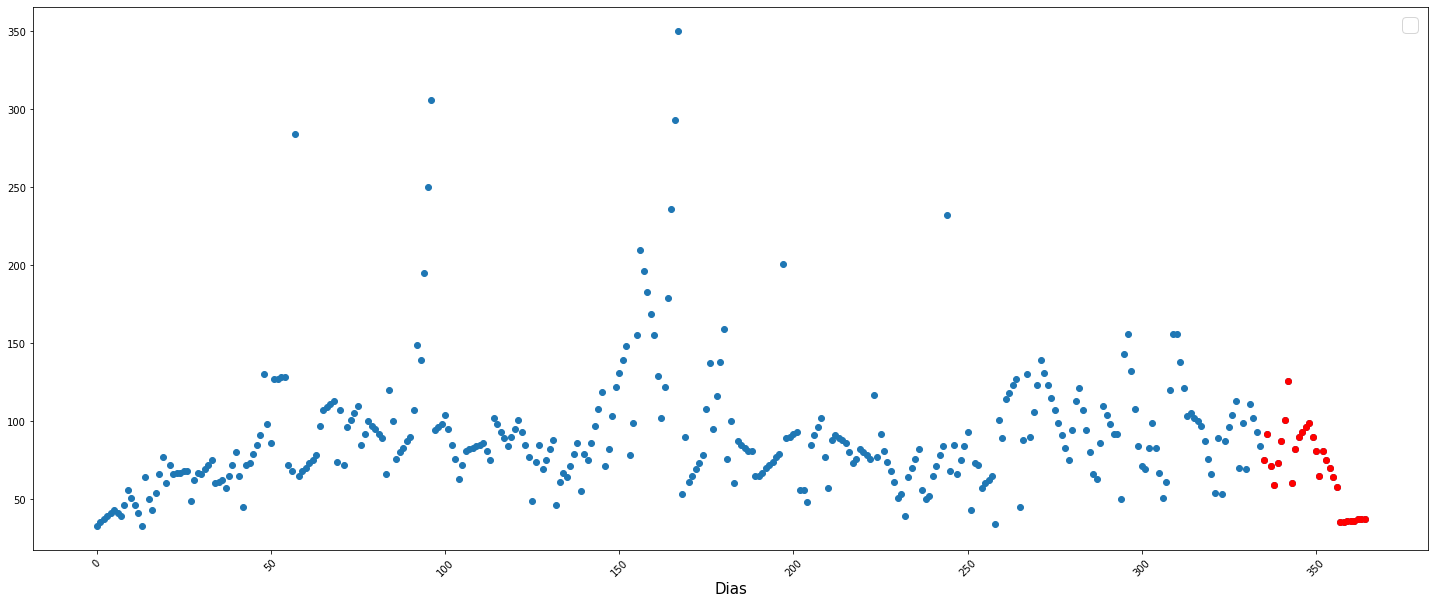

In [73]:
# Distribuição dos valores de y ao longo da série temporal
fig = plt.figure(figsize=(25,10))
ax = fig.add_subplot(1,1,1) 
# plt.title('', fontsize=25)
plt.scatter(y.index,y)
plt.scatter(y_test.index, y_test,c='r')
plt.legend(fontsize=20)
plt.xlabel('Dias', fontsize=15)
plt.xticks(fontsize=10, rotation=45)

# ax.xaxis.set_major_locator(mdates.MonthLocator(interval=1)) 
# ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%M-%d'))

plt.show()

In [74]:
# Padronização (Standardization) para o y
# Sempre usar os dados de treino apenas para construir o modelo, então transformar o teste com base no treino (como se o teste fossem dados novos)
y_train = np.array(y_training).reshape(len(y_training),1)
y_testing = np.array(y_test).reshape(len(y_test),1)

scalery = StandardScaler().fit(y_train)
normalized_y_train = pd.DataFrame(
    scalery.transform(y_train),
    columns = [y_training.name],
    index = y_training.index
)
normalized_y_train = normalized_y_train.squeeze()

normalized_y_test = pd.DataFrame(
    scalery.transform(y_testing),
    columns = [y_test.name],
    index = y_test.index
)
normalized_y_test = normalized_y_test.squeeze()


# Padronização dos previsores (DataFrame X)
scalerX = StandardScaler().fit(X_training)

normalized_x_train = pd.DataFrame(
    scalerX.transform(X_training),
    columns = X_training.columns,
    index = X_training.index
)


normalized_x_test = pd.DataFrame(
    scalerX.transform(X_test),
    columns = X_test.columns,
    index = X_test.index
)

In [75]:
# Linear Regression

# criando o objeto do modelo com LinearRegression
reg = LinearRegression()

# treinando o modelo com o grid search
reg.fit(normalized_x_train, normalized_y_train)

# printando os resultados da regressão linear
print(reg.score(normalized_x_train, normalized_y_train))

# pegando e imprimindo os coeficientes
print(reg.coef_)
print(reg.intercept_)


0.12018874594124784
[ -0.04849252  13.33959962  12.65015846 -19.68083956]
-3.4252184109081848e-15


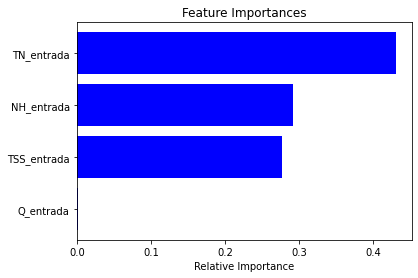

In [76]:
# desenhando o gráfico de impoartância de variáveis
features = normalized_x_train.columns
importances = abs(reg.coef_)/sum(abs(reg.coef_))
indices = np.argsort(importances)


plt.title('Feature Importances')
plt.barh(range(len(importances[indices][-16:])), importances[indices][-16:], color='b', align='center')
plt.yticks(range(len(importances[indices][-16:])), [features[i] for i in indices[-16:]])
plt.xlabel('Relative Importance')
plt.show()

In [77]:
# Feature importance em DataFrame para ser mais consumível
df_importances = pd.DataFrame({'feature': features, 'importances': importances, 'coeficientes': reg.coef_})
df_importances.sort_values(by='importances', ascending=False)

,feature,importances,coeficientes
3,TN_entrada,0.430473,-19.680840
1,NH_entrada,0.291773,13.339600
2,TSS_entrada,0.276693,12.650158
0,Q_entrada,0.001061,-0.048493


In [78]:
# Realizando a predição no teste
y_test_pred_lr = reg.predict(normalized_x_test)

y_test_pred_lr = np.array(y_test_pred_lr).reshape(len(y_test_pred_lr),1)
y_test_pred_lr = scalery.inverse_transform(y_test_pred_lr)
y_test_pred_lr = pd.DataFrame(y_test_pred_lr, columns=[normalized_y_test.name], index = normalized_y_test.index )
y_test_pred_lr = y_test_pred_lr.squeeze()

y_test_pred_lr



# Análise dos erros das previsões
rmse_test_lr = math.sqrt(mean_squared_error(y_test, y_test_pred_lr))
mae_test_lr = mean_absolute_error(y_test, y_test_pred_lr)
mape_test_lr = mean_absolute_percentage_error(y_test, y_test_pred_lr)
r2_test_lr = r2_score(y_test, y_test_pred_lr)


df_metricas = pd.DataFrame(data={'RSME':[rmse_test_lr], 'MAE':[mae_test_lr], 'MAPE':[mape_test_lr],'R²':[r2_test_lr]})
df_metricas

,RSME,MAE,MAPE,R²
0,23.713948,19.65916,0.366609,0.049834


In [79]:
# plotar valor real vs valor predito

# Escrever a discussão dos resultados obtidos pelos diferentes métodos de machine learning
# comentando os resultados obtidos, por exemplo: "no modelo de regressão linear a importância
# do pH do tq2 foi muito alta, não parecendo refletir a realidade". Incluir meus questionamentos e dúvidas também
# Incluir as literaturas utilizada como base (referências). Comparar com resultados de outros problemas por outras pessoas.

In [80]:
# Preparação do DataFrame comparativo entre a previsão e o valor real, indexado pelo dia

df_comparacao = pd.concat([y_test,y_test_pred_lr],axis=1)
df_comparacao.columns = ['Valor_Real','Valor_Predito']
df_comparacao['Diferenca_percentual'] = 100*(df_comparacao['Valor_Predito'] - df_comparacao['Valor_Real'])/df_comparacao['Valor_Real']
df_comparacao.sort_index(inplace=True)
df_comparacao

,Valor_Real,Valor_Predito,Diferenca_percentual
Dia,,,
335,75.0,81.053032,8.070710
336,92.0,101.246130,10.050141
337,71.0,108.580472,52.930243
338,59.0,106.974239,81.312270
339,73.0,114.723082,57.154907
340,87.0,112.158623,28.917958
341,101.0,120.623990,19.429693
342,126.0,84.017211,-33.319674
343,60.0,97.251061,62.085102


In [81]:

# plt.title('Geração de Lodo Real vs Predito')
# plt.scatter(df_comparacao.index, df_comparacao['Valor_Real'], label = 'Real')
# plt.scatter(df_comparacao.index, df_comparacao['Valor_Predito'], label = 'Predito')
# plt.legend()
# plt.xlabel('Dias')
# plt.show()

        RSME       MAE      MAPE        R²
0  23.713948  19.65916  0.366609  0.049834


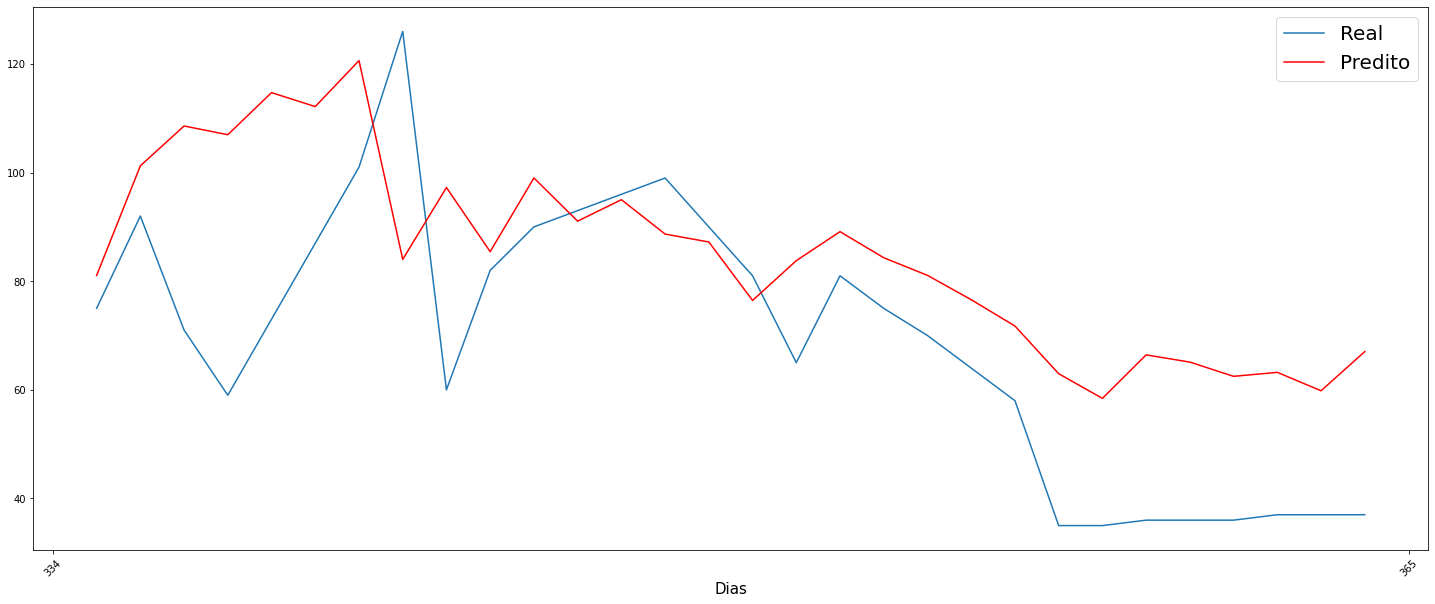

In [82]:
print(df_metricas)
import matplotlib.dates as mdates
# Visualização gráfica das predições comparadas aos valores reais
fig = plt.figure(figsize=(25,10))
ax = fig.add_subplot(1,1,1) 
# plt.title('', fontsize=25)
plt.plot(df_comparacao.index, df_comparacao['Valor_Real'], label = 'Real')
plt.plot(df_comparacao.index, df_comparacao['Valor_Predito'], label = 'Predito', c='r')
plt.legend(fontsize=20)
plt.xlabel('Dias', fontsize=15)
plt.xticks(fontsize=10, rotation=45)

ax.xaxis.set_major_locator(mdates.MonthLocator(interval=1)) 
# ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%M-%d'))

plt.show()

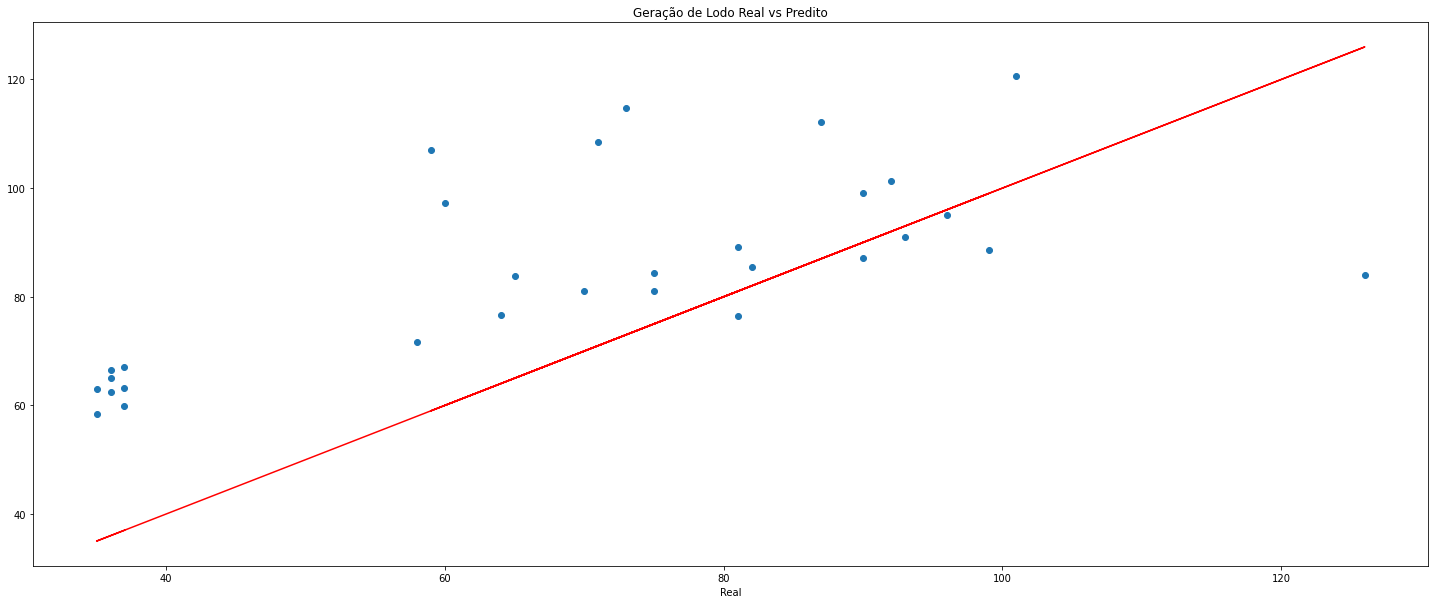

In [83]:
# Visualização gráfica das predições por valores reais
plt.figure(figsize=(25,10))
plt.title('Geração de Lodo Real vs Predito')
plt.scatter(df_comparacao['Valor_Real'], df_comparacao['Valor_Predito'])
plt.plot(df_comparacao['Valor_Real'],df_comparacao['Valor_Real'],c='r')
plt.xlabel('Previsto')
plt.xlabel('Real')
plt.show()

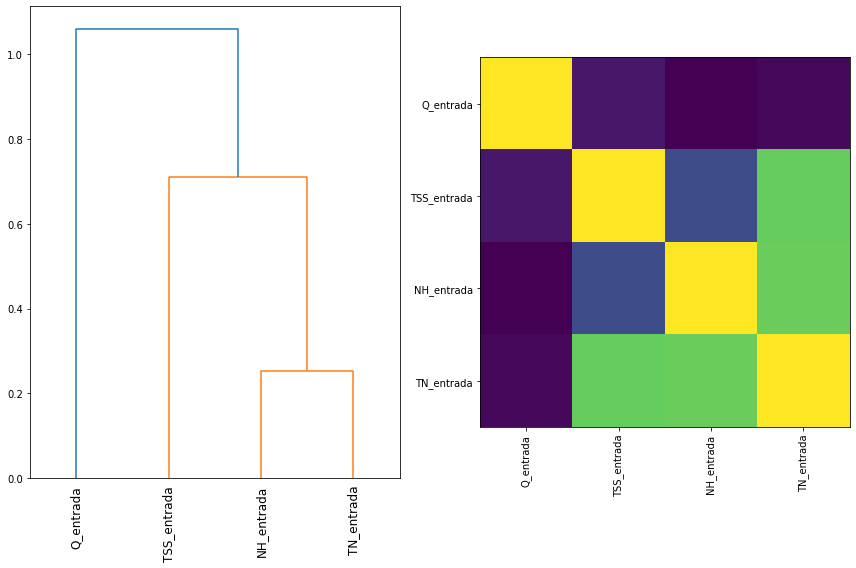

In [84]:
from scipy.stats import spearmanr
from scipy.cluster import hierarchy
from scipy.spatial.distance import squareform

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 8))
corr = spearmanr(normalized_x_train).correlation

# Ensure the correlation matrix is symmetric
corr = (corr + corr.T) / 2
np.fill_diagonal(corr, 1)

# We convert the correlation matrix to a distance matrix before performing
# hierarchical clustering using Ward's linkage.
distance_matrix = 1 - np.abs(corr)

dist_linkage = hierarchy.ward(squareform(distance_matrix))
dendro = hierarchy.dendrogram(
    dist_linkage, labels=X.columns, ax=ax1, leaf_rotation=90
)
dendro_idx = np.arange(0, len(dendro["ivl"]))

ax2.imshow(corr[dendro["leaves"], :][:, dendro["leaves"]])
ax2.set_xticks(dendro_idx)
ax2.set_yticks(dendro_idx)
ax2.set_xticklabels(dendro["ivl"], rotation="vertical")
ax2.set_yticklabels(dendro["ivl"])
fig.tight_layout()
plt.show()

In [85]:
normalized_x_train.corr()

,Q_entrada,NH_entrada,TSS_entrada,TN_entrada
Q_entrada,1.000000,-0.058856,-0.062833,-0.079088
NH_entrada,-0.058856,1.000000,0.178544,0.787613
TSS_entrada,-0.062833,0.178544,1.000000,0.746886
TN_entrada,-0.079088,0.787613,0.746886,1.000000


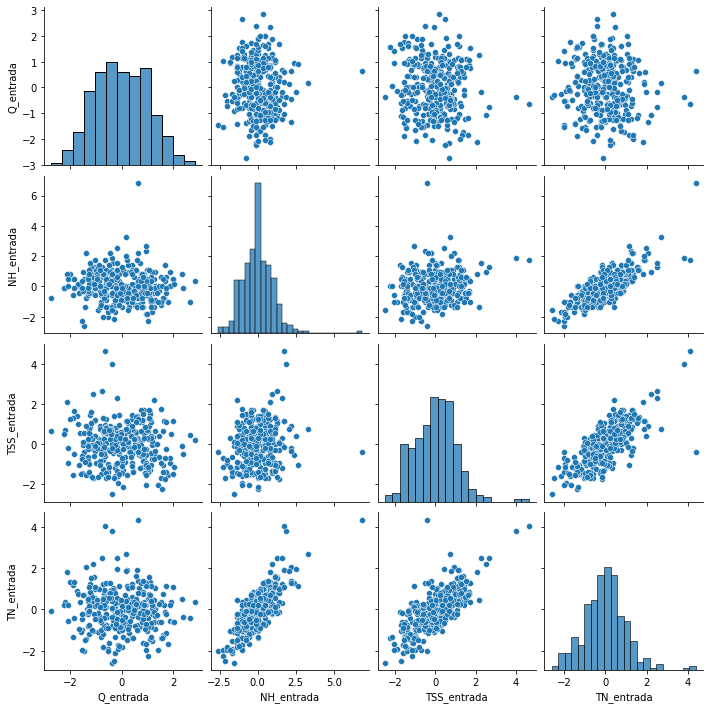

In [86]:
# libraries
import seaborn as sns
# Basic correlogram
sns.pairplot(normalized_x_train)
plt.show()

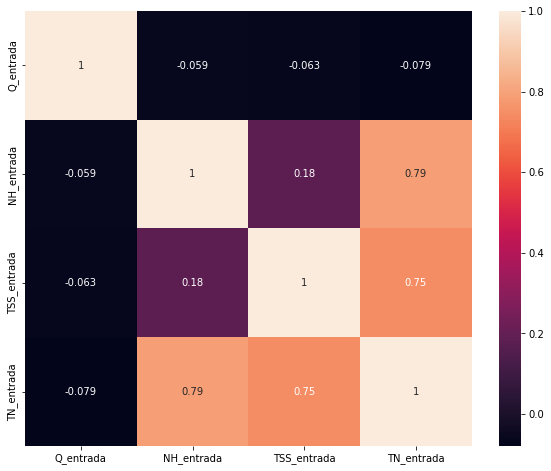

In [87]:
fig, ax = plt.subplots(figsize=(10,8))
p1 = sns.heatmap(normalized_x_train.corr(), annot=True, annot_kws={"size": 10}, ax=ax)

In [88]:
# from collections import defaultdict

# cluster_ids = hierarchy.fcluster(dist_linkage, 1, criterion="distance")
# cluster_id_to_feature_ids = defaultdict(list)
# for idx, cluster_id in enumerate(cluster_ids):
#     cluster_id_to_feature_ids[cluster_id].append(idx)
# selected_features = [v[0] for v in cluster_id_to_feature_ids.values()]

# X_train_sel = X_train[:, selected_features]
# X_test_sel = X_test[:, selected_features]

# clf_sel = LinearRegression()
# clf_sel.fit(X_train_sel, y_train)
# print(
#     "Accuracy on test data with features removed: {:.2f}".format(
#         clf_sel.score(X_test_sel, y_test)
#     )
# )